**Load the Dataset**

In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Load the Dataset
df=pd.read_csv('/content/telcom_customer.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Explore the dataset**

In [63]:
# Get the number of samples and features
num_samples = df.shape[0]
num_features = df.shape[1]

# Print the results
print("Number of samples:", num_samples)
print("Number of features:", num_features)

Number of samples: 7043
Number of features: 21


In [ ]:
df.info

In [ ]:
df.describe

In [64]:
# Check for missing values
df.isnull().sum()

# Drop columns with high missing value percentage
df = df.dropna(thresh=len(df) * 0.7, axis=1)

# Handle missing values in remaining columns
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)  # Replace empty cells with 0 for numeric column 'TotalCharges'
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean())  # Replace missing values with mean for 'MonthlyCharges'


In [65]:
# Drop customerID feature.
df = df.drop(columns='customerID')

In [66]:
# Changing the data tyoe of "TotalCharges" and "tenure" to float.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

def feature_to_float(feature_list, df):
    for i in feature_list:
        df[i] = df[i].astype(float)
    return df

feature_to_float(['tenure'], df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [67]:
# Renaming values of "PaymentMethod" for making them concise for graph and readibility
payment_column = {'Electronic check': 'E-Check' , 'Mailed check': 'Mail-Check', 'Bank transfer (automatic)': 'Bank-Transfer', 'Credit card (automatic)': 'Credit Card'}
df["PaymentMethod"].replace(payment_column, inplace=True)

**Exploratory data analysis (EDA)**

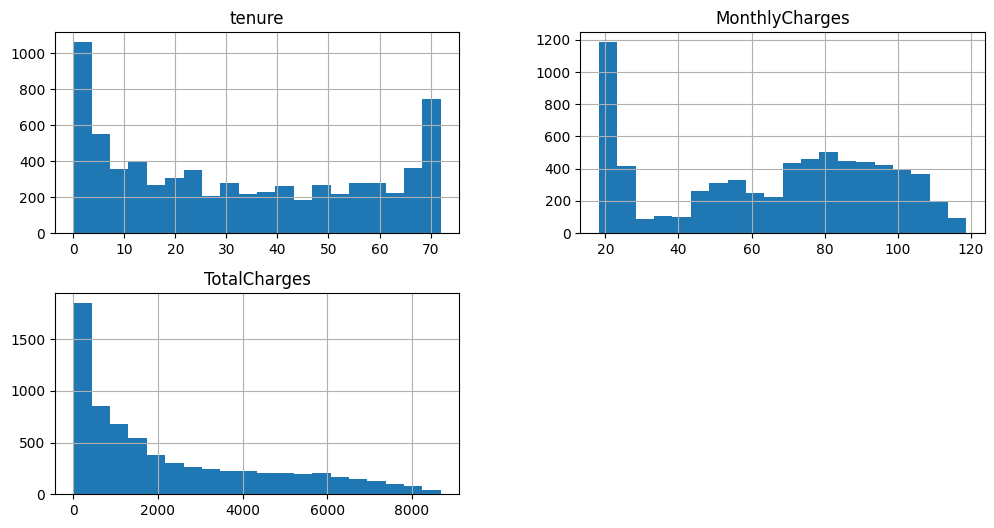

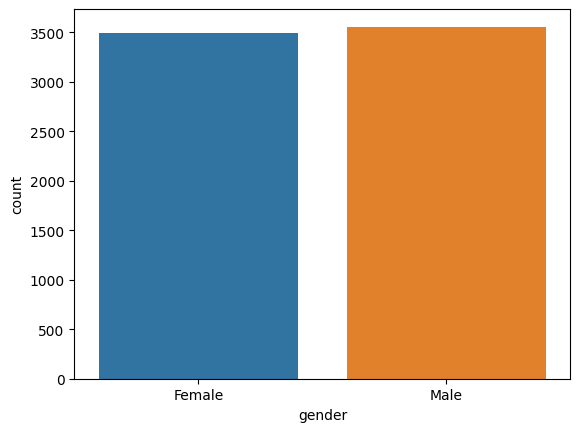

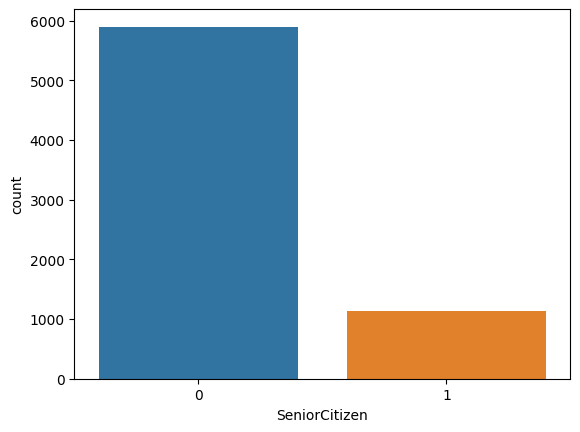

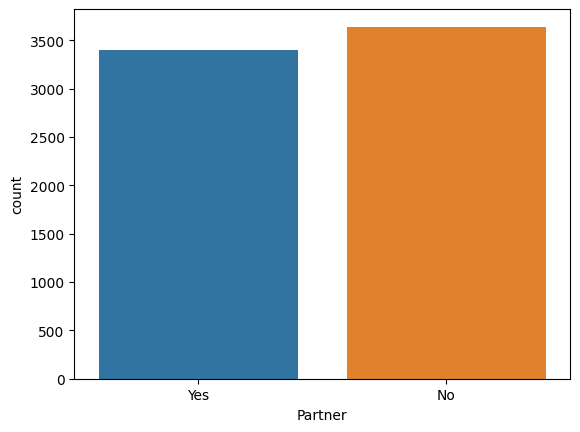

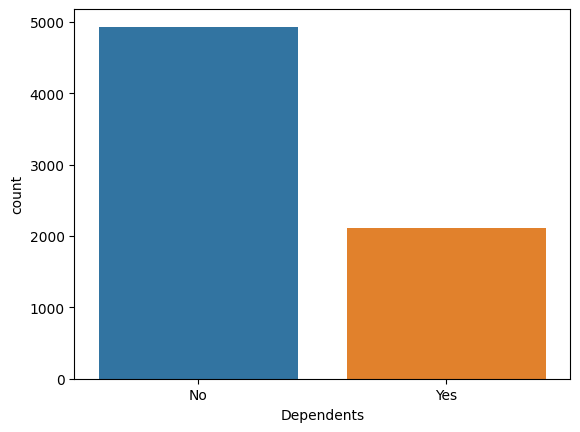

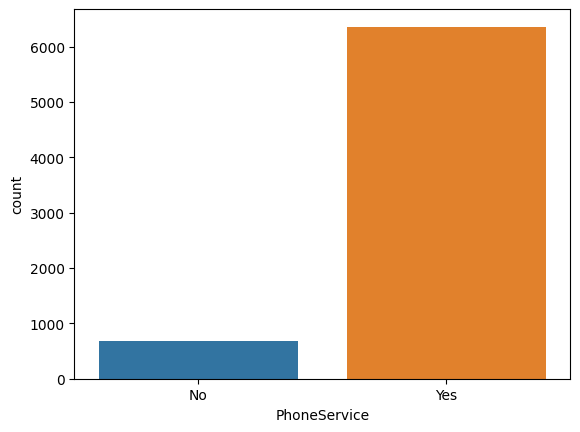

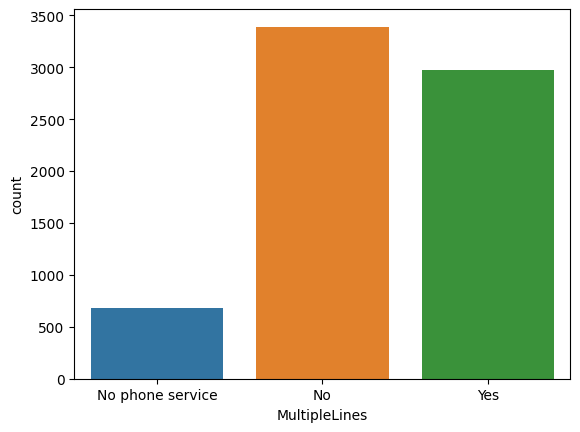

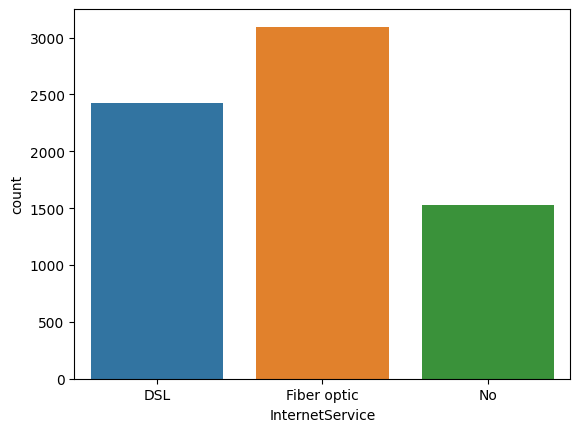

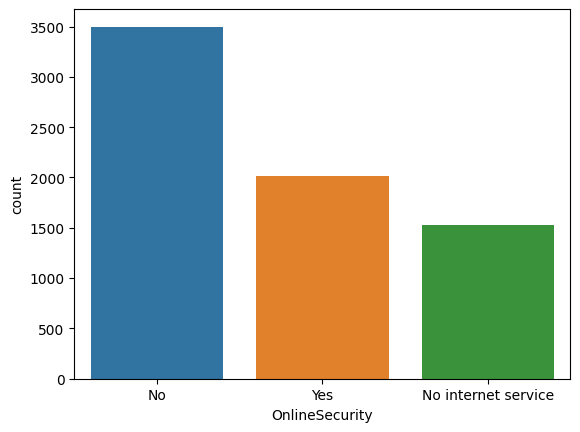

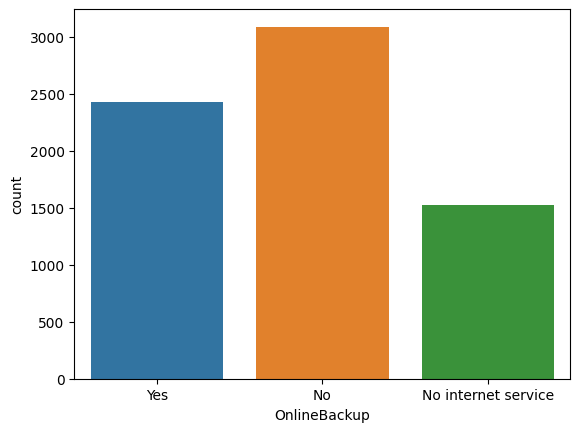

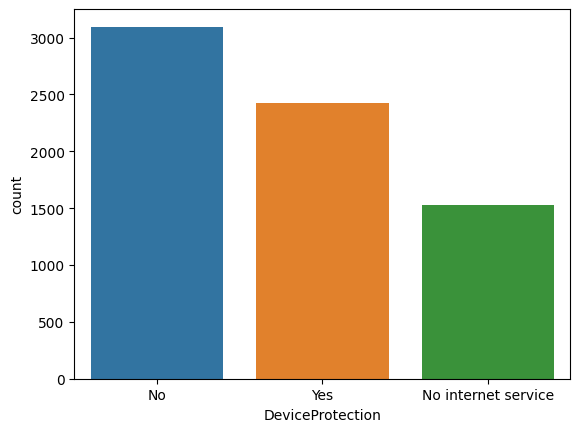

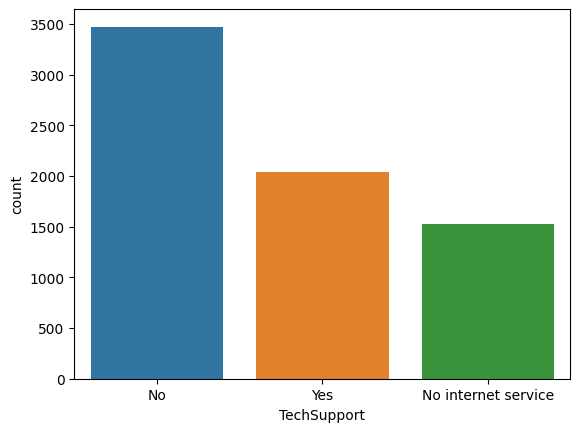

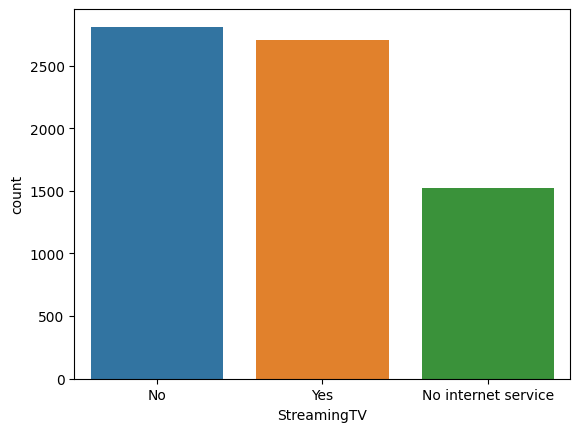

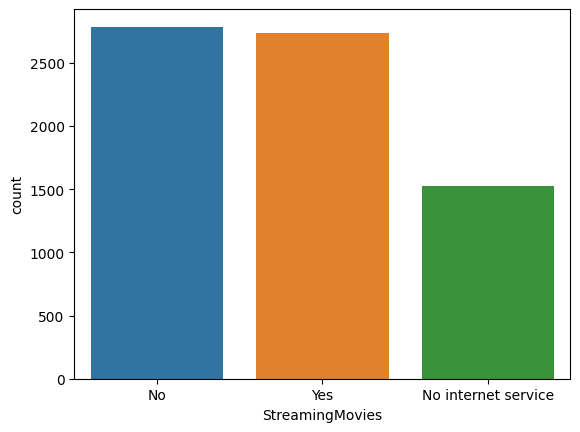

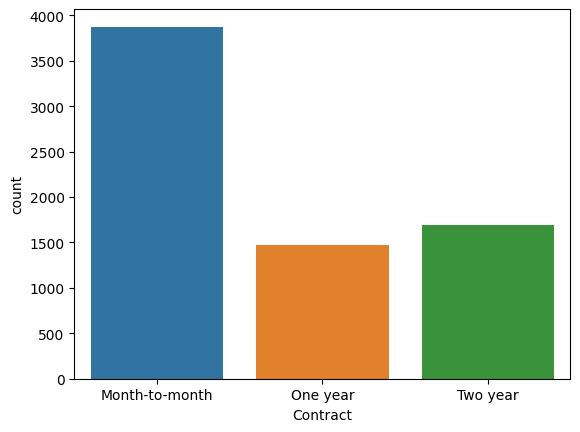

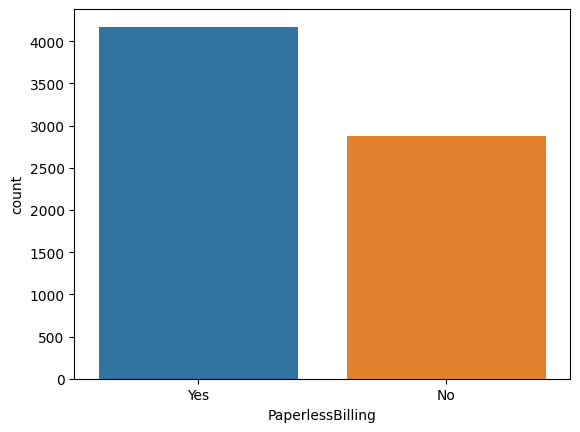

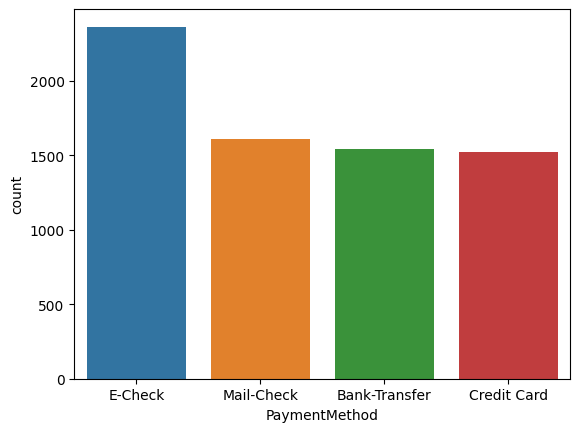

In [68]:

# Plot histogram of numeric features
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols].hist(bins=20, figsize=(12, 6))
plt.show()
plt.tight_layout()

# Plot bar charts for categorical features
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.show()



In [69]:
from scipy.stats import chi2_contingency



# Plot bar charts for categorical features
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Perform chi-square test for categorical features
for feature in categorical_cols:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < 0.05:
        print(f"{feature} is dependent on Churn (p-value: {p_value})")

SeniorCitizen is dependent on Churn (p-value: 1.510066805092378e-36)
Partner is dependent on Churn (p-value: 2.1399113440759935e-36)
Dependents is dependent on Churn (p-value: 4.9249216612154196e-43)
MultipleLines is dependent on Churn (p-value: 0.0034643829548773)
InternetService is dependent on Churn (p-value: 9.571788222840544e-160)
OnlineSecurity is dependent on Churn (p-value: 2.661149635176552e-185)
OnlineBackup is dependent on Churn (p-value: 2.0797592160864276e-131)
DeviceProtection is dependent on Churn (p-value: 5.505219496457244e-122)
TechSupport is dependent on Churn (p-value: 1.4430840279998987e-180)
StreamingTV is dependent on Churn (p-value: 5.528994485739183e-82)
StreamingMovies is dependent on Churn (p-value: 2.667756755723681e-82)
Contract is dependent on Churn (p-value: 5.863038300673391e-258)
PaperlessBilling is dependent on Churn (p-value: 4.073354668665985e-58)
PaymentMethod is dependent on Churn (p-value: 3.6823546520097993e-140)


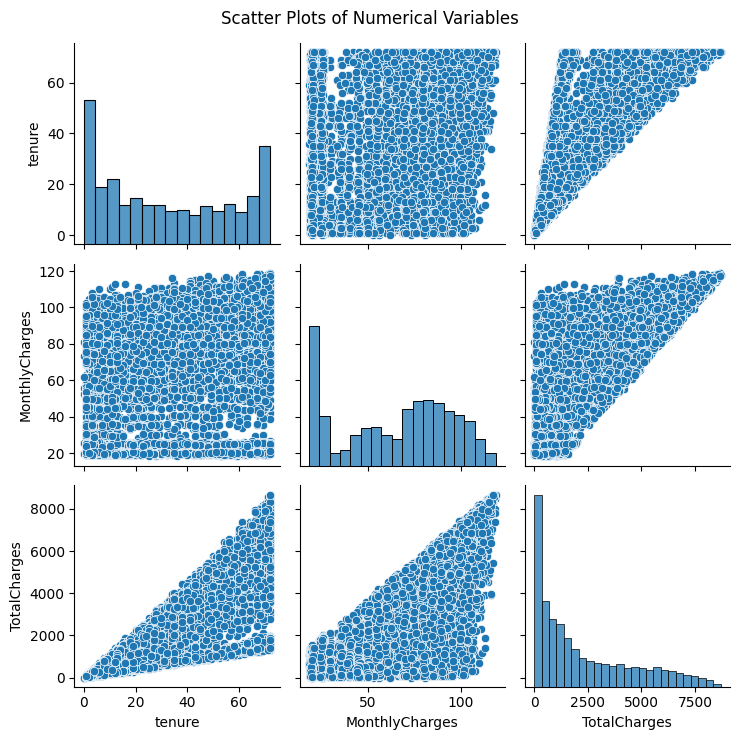

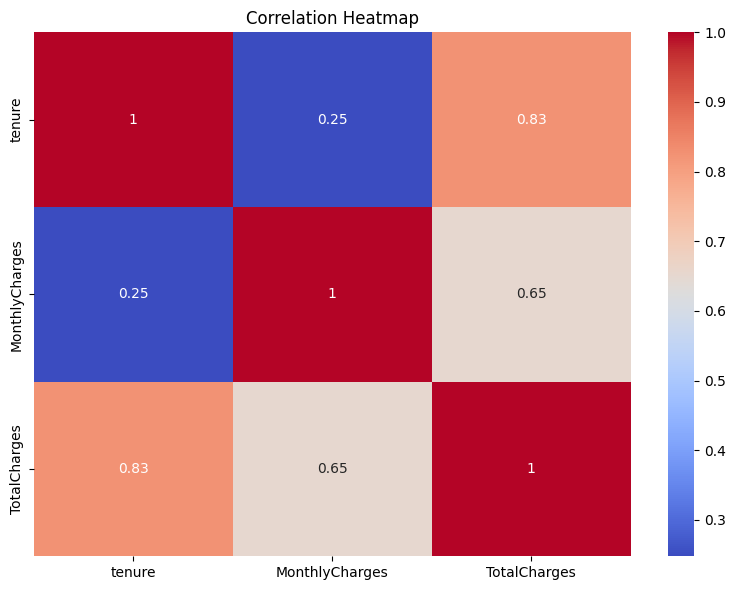

In [70]:

# Select the numeric columns for correlation analysis
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_df = df[numeric_cols]

# Generate scatter plots between numerical variables
sns.pairplot(numeric_df)
plt.suptitle('Scatter Plots of Numerical Variables')
plt.tight_layout()
plt.show()

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr(numeric_only=True)



# Generate a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [71]:
# Calculate the churn rate
total_customers = len(df)
churned_customers = len(df[df['Churn'] == 'Yes'])
churn_rate = (churned_customers / total_customers) * 100

# Print the churn rate
print("Churn rate: {:.2f}%".format(churn_rate))


Churn rate: 26.54%


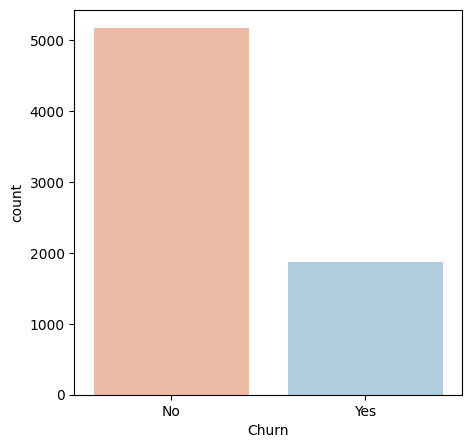

In [72]:
# Display a frequency distribution for churn.
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['Churn'], palette="RdBu", linewidth=5)
plt.show()

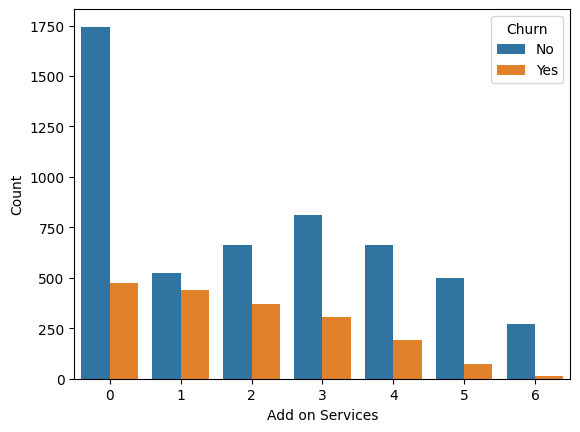

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of extra servies
addon_services = ['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']

# Generate the new feature "AdditionalServices"
df['AdditionalServices'] = df[addon_services].eq('Yes').sum(axis=1)

# Plot the count of AdditionalServices for each churn category
sns.countplot(x='AdditionalServices', hue='Churn', data=df)
plt.xlabel('Add on Services')
plt.ylabel('Count')
plt.show()


**Preprocessing of Data**

In [74]:
# Label encoding for identified columns.
features_le = [ 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return

label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], df)

df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AdditionalServices
0,1,0,1,0,1.0,0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1,E-Check,29.85,29.85,0,1
1,0,0,0,0,34.0,1,No,DSL,Yes,No,...,No,No,No,One year,0,Mail-Check,56.95,1889.50,0,2
2,0,0,0,0,2.0,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mail-Check,53.85,108.15,1,2
3,0,0,0,0,45.0,0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0,Bank-Transfer,42.30,1840.75,0,3
4,1,0,0,0,2.0,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1,E-Check,70.70,151.65,1,0


In [75]:
def one_hot_encoding(features, df):
    for feature in features:
        encoded_cols = pd.get_dummies(df[feature], prefix=feature)
        df = pd.concat([df, encoded_cols], axis=1)
        df.drop([feature], axis=1, inplace=True)
    return df

df_encoded = one_hot_encoding(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'AdditionalServices'], df)



In [76]:
# Min-Max-Scaling for identified columns.
from sklearn.preprocessing import MinMaxScaler

features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_features_mms = pd.DataFrame(df, columns=features_mms)
df_remaining_features = df.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

df = pd.concat([df_remaining_features, df_rescaled_features], axis=1)

In [78]:
#Applying sklearn's splitter function train_test_split
from sklearn.model_selection import train_test_split

non_numeric_cols = df.select_dtypes(exclude=['int', 'float']).columns
X = df.drop(['Churn'] + list(non_numeric_cols), axis=1)  # Assuming the target variable is named 'Churn'

y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Training(Logistic Regression)**

In [79]:
import pandas as pd

# Check for NaN values in X_train
print(X_train.isnull().sum())

# Check for NaN values in X_test
print(X_test.isnull().sum())


gender                0
SeniorCitizen         0
Partner               0
Dependents            0
PhoneService          0
PaperlessBilling      0
AdditionalServices    0
tenure                0
MonthlyCharges        0
TotalCharges          0
dtype: int64
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
PhoneService          0
PaperlessBilling      0
AdditionalServices    0
tenure                0
MonthlyCharges        0
TotalCharges          0
dtype: int64


In [80]:
from sklearn.linear_model import LogisticRegression

# Instanciate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)


#to check the name and number of features that are choosen
num_columns=logreg.coef_.shape[1]
column_names = X_train.columns[:num_columns]

# Print the number of columns and their names
print("Number of columns:", num_columns)
print("Column names:", column_names)

Number of columns: 10
Column names: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'AdditionalServices', 'tenure', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


In [ ]:
!pip install --upgrade scikit-learn

**Model Evaluation**

In [81]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(confusion)

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_prob[:, 1])
auc = roc_auc_score(y_test, y_pred_logreg_prob[:, 1])

# Precision-Recall Curve and F1 Score
precision, recall, _ = precision_recall_curve(y_test, y_pred_logreg_prob[:, 1])
f1 = f1_score(y_test, y_pred_logreg)
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)

# Print evaluation metrics
print("AUC Score:", auc)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)




Confusion Matrix:
[[942  94]
 [171 202]]
AUC Score: 0.8555371246390013
F1 Score: 0.6038863976083708
Accuracy: 0.8119233498935415
Precision: 0.6824324324324325
Recall: 0.5415549597855228


**Insights of Evaluation**

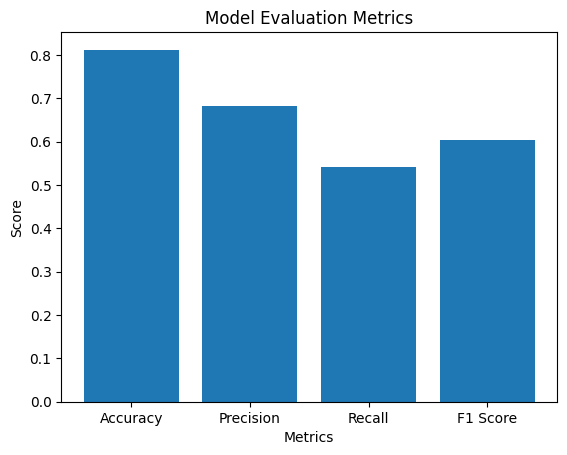

In [82]:
# Create a bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()

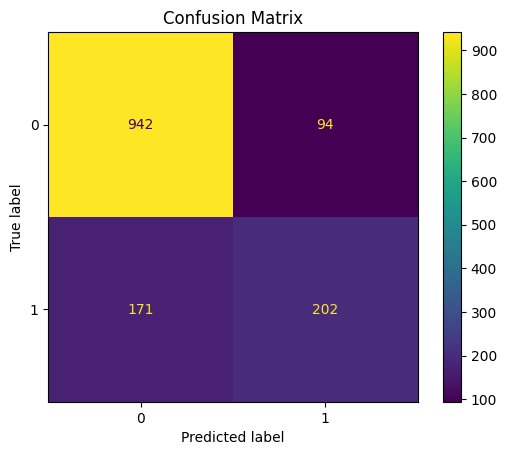

In [83]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Instantiate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions with the trained model on the test set.
y_pred_logreg = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Create a ConfusionMatrixDisplay object with the confusion matrix and class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Plot the confusion matrix
disp.plot()

# Add a title to the plot
plt.title("Confusion Matrix")

# Show the plot
plt.show()


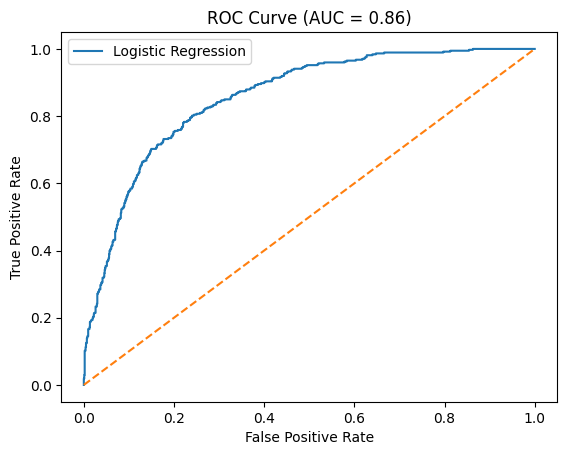

In [84]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Instantiate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions with the trained model on the test set.
y_pred_logreg_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_prob)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_logreg_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.legend(['Logistic Regression'])
plt.show()


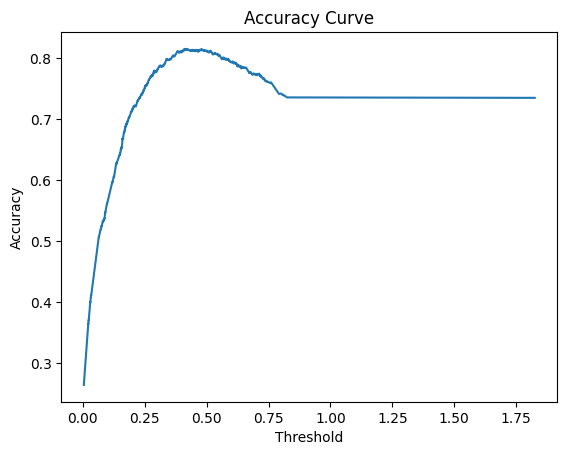

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

# Instantiate and train the logistic regression model based on the training set
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions with the trained model on the test set
y_pred_logreg_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_logreg = logreg.predict(X_test)

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_prob)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_logreg_prob)

# Calculate accuracy for different thresholds
threshold_accuracy = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_logreg_prob >= threshold).astype(int)
    threshold_accuracy.append(accuracy_score(y_test, y_pred_threshold))

# Plot the accuracy curve
plt.plot(thresholds, threshold_accuracy)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()


**Predictions on the test set**

In [ ]:
# Make predictions on the test set
y_pred_test = logreg.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)
# Create a bar graph
metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()

**Feature Enginnering through PCA (Principal Component Analysis)**

In [ ]:
from sklearn.decomposition import PCA

# Separate the independent variables from the dataset
independent_vars = df_encoded.drop(columns=['Churn'])

# Apply PCA on the independent variables
pca = PCA(n_components=2)  # Specify the desired number of components
principlecommnt = pca.fit_transform(independent_vars)


principalDf = pd.DataFrame(data = principlecommnt
             , columns = [' component 1', ' component 2'])

principalDf.head()

,component 1,component 2
0,-2250.292671,-8.855633
1,-390.257142,-6.233567
2,-2171.782396,11.902414
3,-439.031255,-24.041867
4,-2128.140318,26.871701


In [ ]:
from sklearn.model_selection import train_test_split

# Separate the independent variables from the dataset
independent_vars = df_encoded.drop(columns=['Churn'])

# Apply PCA on the independent variables
pca = PCA(n_components=2)  # Specify the desired number of components
principlecommnt = pca.fit_transform(independent_vars)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(independent_vars, df_encoded['Churn'], test_size=0.2, random_state=42)

# Apply PCA transformation on the train and test sets
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Concatenate PCA-transformed features with existing independent variables
X_train_combined = np.concatenate([X_train, X_train_pca], axis=1)
X_test_combined = np.concatenate([X_test, X_test_pca], axis=1)

# Instantiate and train the logistic regression model using PCA-transformed features
logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_combined, y_train)

# Make predictions using the trained model
y_pred_logreg_pca = logreg_pca.predict(X_test_combined)
y_pred_logreg_pca_prob = logreg_pca.predict_proba(X_test_combined)



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy_pca = accuracy_score(y_test, y_pred_logreg_pca)

# Calculate precision
precision_pca = precision_score(y_test, y_pred_logreg_pca)

# Calculate recall
recall_pca = recall_score(y_test, y_pred_logreg_pca)

# Calculate F1 score
f1_score_pca = f1_score(y_test, y_pred_logreg_pca)

# Print the evaluation metrics
print("Accuracy (with PCA):", accuracy_pca)
print("Precision (with PCA):", precision_pca)
print("Recall (with PCA):", recall_pca)
print("F1 Score (with PCA):", f1_score_pca)


Accuracy (with PCA): 0.8197303051809794
Precision (with PCA): 0.6925566343042071
Recall (with PCA): 0.5737265415549598
F1 Score (with PCA): 0.6275659824046921


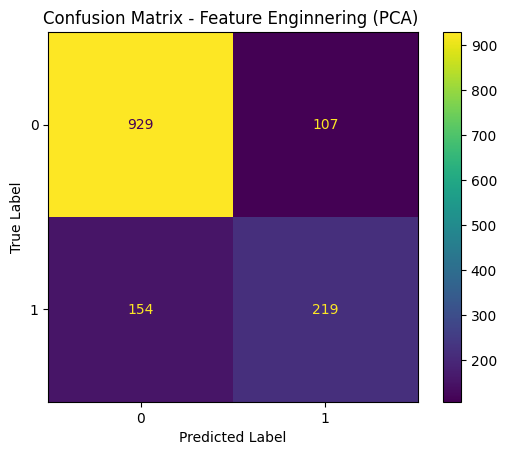

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Compute the confusion matrix
confusion_tuned = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=confusion_tuned, display_labels=logreg_pca.classes_)
disp_tuned.plot()

# Add title and axis labels
plt.title("Confusion Matrix - Feature Enginnering (PCA) ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()

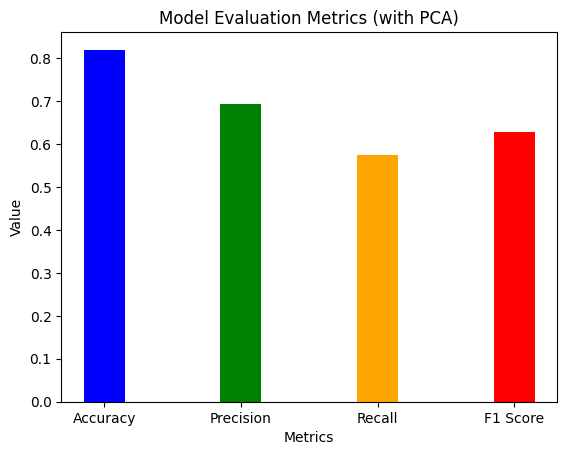

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the metrics and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_pca, precision_pca, recall_pca, f1_score_pca]

# Set the positions and width for the bars
positions = np.arange(len(metrics))
width = 0.3

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(positions, values, width, color=['blue', 'green', 'orange', 'red'])

# Set the axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('Model Evaluation Metrics (with PCA)')

# Set the tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(metrics)

# Display the chart
plt.show()


**Hyperparameter tuning (Cross Validation)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Define the base classifier
base_model = LogisticRegression(max_iter=10000)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=base_model, param_distributions=param_grid, scoring='f1', n_iter=10, cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Train the best model on the training dataset
best_model.fit(X_train, y_train)

# Evaluate the best model on the testing dataset
y_pred = best_model.predict(X_test)
# Calculate f1
f1 = f1_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision
precision= precision_score(y_test, y_pred)
# Calculate recall
re_call= precision_score(y_test, y_pred)

# Print the best hyperparameters and the F1 score
print("Best Hyperparameters:", best_params)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("precision:", precision)
print("re_call:", re_call)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10.0}
F1 Score: 0.6266094420600857
Accuracy: 0.8147622427253371
precision: 0.6717791411042945
re_call: 0.6717791411042945


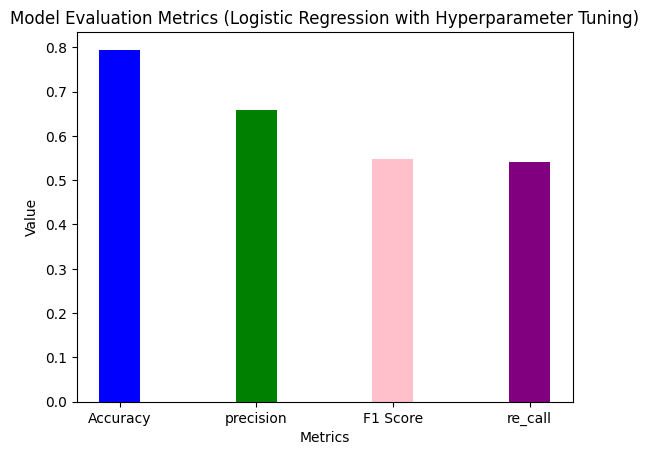

In [ ]:

# Define the metrics and their corresponding values
metrics = ['Accuracy', 'precision', 'F1 Score', 're_call']
values = [accuracy, precision, f1, recall]

# Set the positions and width for the bars
positions = np.arange(len(metrics))
width = 0.3

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(positions, values, width, color=['blue', 'green', 'pink', 'purple'])

# Set the axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('Model Evaluation Metrics (Logistic Regression with Hyperparameter Tuning)')

# Set the tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(metrics)

# Display the chart
plt.show()


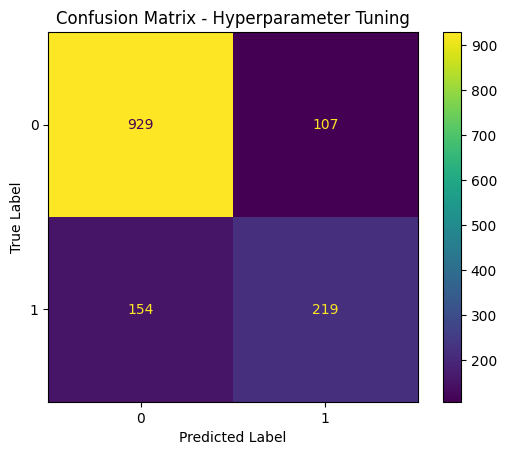

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Compute the confusion matrix
confusion_tuned = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=confusion_tuned, display_labels=best_model.classes_)
disp_tuned.plot()

# Add title and axis labels
plt.title("Confusion Matrix - Hyperparameter Tuning")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()


**Random Forest for model improvement**

Random Forest - Accuracy: 0.7806955287437899
Random Forest - F1 Score: 0.5339366515837104
Random Forest - Precision: 0.6103448275862069
Random Forest - Re_call 0.4745308310991957


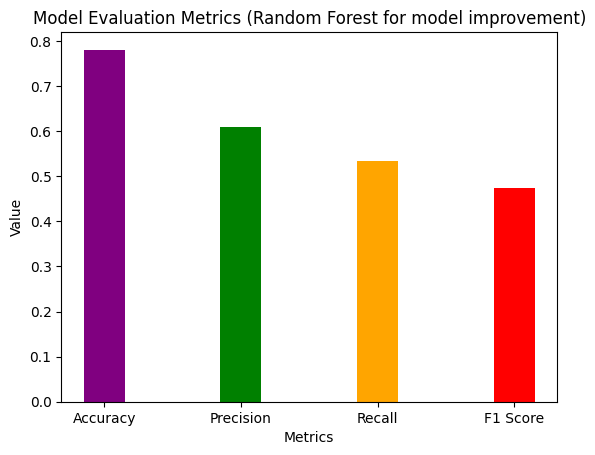

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Instantiate and train the random forest classifier based on the training set.
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Make predictions with the trained random forest model on the test set.
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy, F1 score, and precision of the random forest model.
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
re_call= recall_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest - Accuracy:", accuracy)
print("Random Forest - F1 Score:", f1)
print("Random Forest - Precision:", precision)
print("Random Forest - Re_call", re_call)


# Define the metrics and their corresponding values

values = [accuracy, precision, f1, re_call]

# Set the positions and width for the bars
positions = np.arange(len(metrics))
width = 0.3

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(positions, values, width, color=['purple', 'green', 'orange', 'red'])

# Set the axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('Model Evaluation Metrics (Random Forest for model improvement)')

# Set the tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(metrics)

# Display the chart
plt.show()


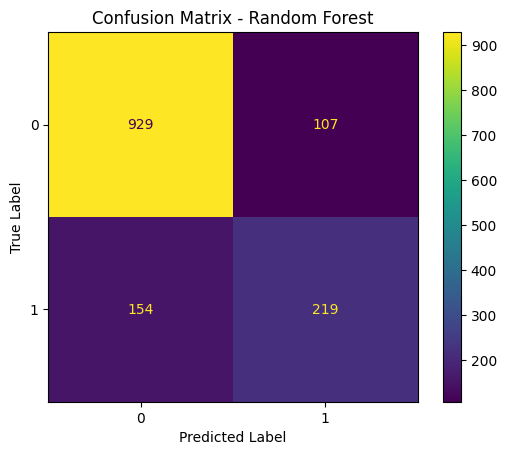

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Compute the confusion matrix
confusion_tuned = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=confusion_tuned, display_labels=random_forest.classes_)
disp_tuned.plot()

# Add title and axis labels
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()